## 岭回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
x = np.random.uniform(-3, 3, size = 100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size = 100)

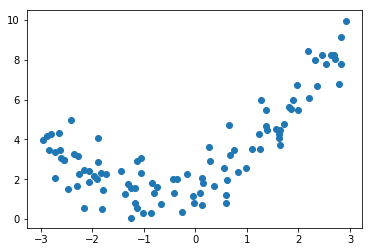

In [3]:
plt.scatter(x,y)

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree):
    return Pipeline([
        ("poly",PolynomialFeatures(degree = degree)),
        ("std_scaler",StandardScaler()),
        ("lin_reg",LinearRegression())
    ])

In [6]:
from sklearn.model_selection import train_test_split

np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [7]:
from sklearn.metrics import mean_squared_error

poly_reg = PolynomialRegression(degree =20)
poly_reg.fit(X_train,y_train)

y_poly_predict = poly_reg.predict(X_test)
mean_squared_error(y_test,y_poly_predict)

167.94010860743623

[-3, 3, 0, 6]

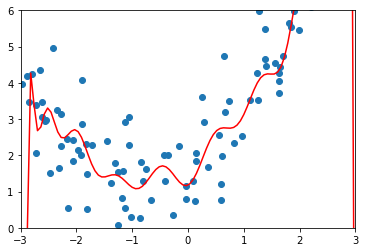

In [8]:
X_plot = np.linspace(-3,3,100).reshape(100,1)
y_plot = poly_reg.predict(X_plot)

plt.scatter(x,y)
plt.plot(X_plot[:,0],y_plot,color='r')
plt.axis([-3,3,0,6])

In [10]:
def plot_model(model):
    X_plot = np.linspace(-3,3,100).reshape(100,1)
    y_plot = model.predict(X_plot)
    
    plt.scatter(x,y)
    plt.plot(X_plot[:,0],y_plot,color='r')
    plt.axis([-3,3,0,6])

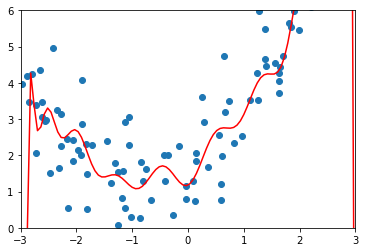

In [12]:
plot_model(poly_reg)

### 使用岭回归

In [13]:
from sklearn.linear_model import Ridge

def RidgeRegression(degree,alpha):
    return Pipeline([
        ("poly",PolynomialFeatures(degree = degree)),
        ("std_scaler",StandardScaler()),
        ("lin_reg",Ridge(alpha = alpha))
    ])

In [14]:
ridge1_reg = RidgeRegression(20,0.0001)
ridge1_reg.fit(X_train,y_train)

y1_predict = ridge1_reg.predict(X_test)
mean_squared_error(y_test,y1_predict)

1.323321421279525

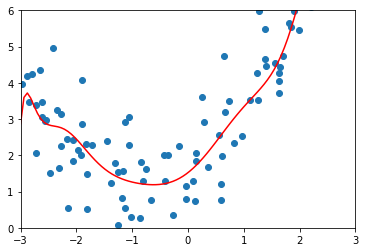

In [15]:
plot_model(ridge1_reg)

In [16]:
ridge2_reg = RidgeRegression(20,1)
ridge2_reg.fit(X_train,y_train)

y1_predict = ridge2_reg.predict(X_test)
mean_squared_error(y_test,y1_predict)

1.1805874402435252

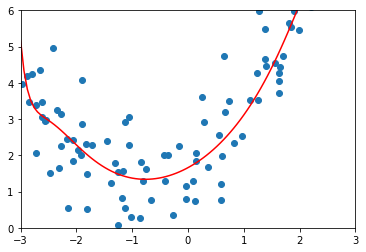

In [18]:
plot_model(ridge2_reg)

In [19]:
ridge3_reg = RidgeRegression(20,100)
ridge3_reg.fit(X_train,y_train)

y1_predict = ridge3_reg.predict(X_test)
mean_squared_error(y_test,y1_predict)

2.1834620336185577

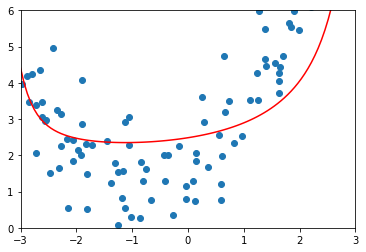

In [20]:
plot_model(ridge3_reg)

## LASSO

In [21]:
np.random.seed(42)
x = np.random.uniform(-3, 3, size = 100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size = 100)

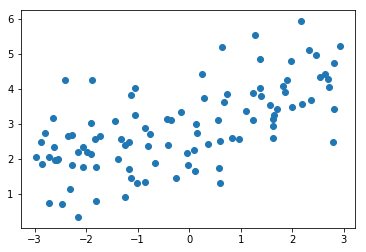

In [22]:
plt.scatter(x,y)

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree):
    return Pipeline([
        ("poly",PolynomialFeatures(degree = degree)),
        ("std_scaler",StandardScaler()),
        ("lin_reg",LinearRegression())
    ])

In [24]:
poly_reg = PolynomialRegression(degree =20)
poly_reg.fit(X_train,y_train)

y_poly_predict = poly_reg.predict(X_test)
mean_squared_error(y_test,y_poly_predict)

167.94010860743623

In [25]:
def plot_model(model):
    X_plot = np.linspace(-3,3,100).reshape(100,1)
    y_plot = model.predict(X_plot)
    
    plt.scatter(x,y)
    plt.plot(X_plot[:,0],y_plot,color='r')
    plt.axis([-3,3,0,6])

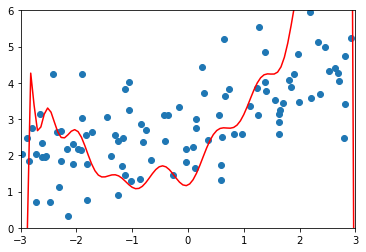

In [26]:
plot_model(poly_reg)

In [27]:
from sklearn.linear_model import Lasso

def LassoRegression(degree,alpha):
    return Pipeline([
        ("poly",PolynomialFeatures(degree = degree)),
        ("std_scaler",StandardScaler()),
        ("lasso_reg",Lasso(alpha = alpha))
    ])

In [28]:
lasso1_reg = LassoRegression(20,0.01)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [30]:
lasso1_reg.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso_reg', Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [31]:
y1_predict = lasso1_reg.predict(X_test)
mean_squared_error(y_test,y1_predict)

1.0202810841744545

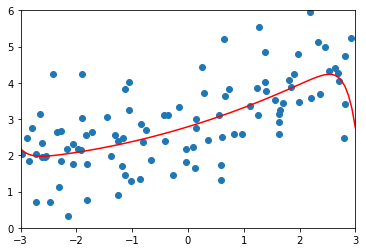

In [32]:
plot_model(lasso1_reg)

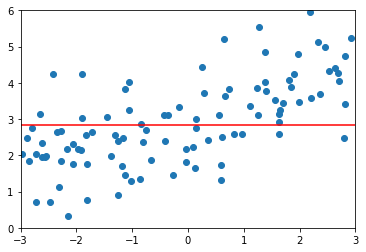

In [35]:
lasso2_reg = LassoRegression(20,1)
lasso2_reg.fit(X_train,y_train)
y2_predict = lasso2_reg.predict(X_test)
plot_model(lasso2_reg)

In [36]:
mean_squared_error(y_test,y2_predict)

1.680289847414575